In [1]:
import GCRCatalogs
import numpy as np
import matplotlib.pyplot as plt
import objectSelection

In [2]:
cosmoDC2 = 'cosmoDC2_v1.1.4_small'
data, dt_cent, main_index = objectSelection.select_halos(cosmoDC2, 2)

In [4]:
print(main_index)

[ 1100250. 34201127.]


In [3]:
cylindrical_cut = objectSelection.lss_cyl_cut(dt_cent, main_index)

In [4]:
x = dt_cent['position_x']; y=dt_cent['position_y']; z = dt_cent['position_z']
print(len(x))
ids = np.array(list(cylindrical_cut.keys()))
print(ids)

282043975
[935700155279 135700142421]


In [6]:
nearby_halos_xy = cylindrical_cut[ids[0]]

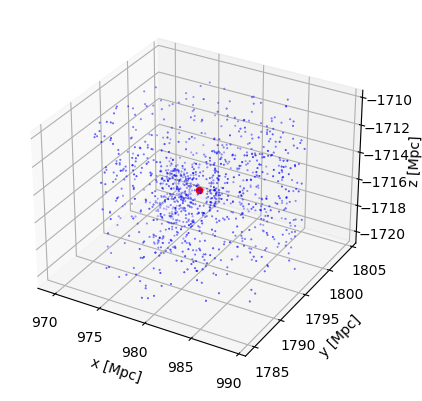

In [7]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('x [Mpc]'); ax.set_ylabel('y [Mpc]'); ax.set_zlabel('z [Mpc]')

ax.scatter(x[nearby_halos_xy],y[nearby_halos_xy],z[nearby_halos_xy], marker='.', s=0.75, c='blue') #, c=s, vmin=10**14, vmax = 2*10**14)
ax.scatter(x[np.where(dt_cent['halo_id'] == ids[0])], y[np.where(dt_cent['halo_id'] == ids[0])], z[np.where(dt_cent['halo_id'] == ids[0])], c='red')

#fig.colorbar(sct)
plt.savefig('xyz_nearby.png')
plt.show()

In [8]:
nearby_halos_xy2 = cylindrical_cut[ids[1]]

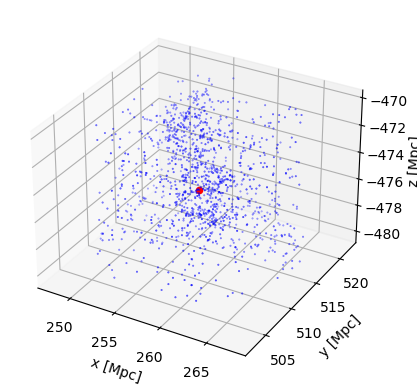

In [9]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('x [Mpc]'); ax.set_ylabel('y [Mpc]'); ax.set_zlabel('z [Mpc]')

ax.scatter(x[nearby_halos_xy2],y[nearby_halos_xy2],z[nearby_halos_xy2], marker='.', s=0.75, c='blue') #, c=s, vmin=10**14, vmax = 2*10**14)
ax.scatter(x[np.where(dt_cent['halo_id'] == ids[1])], y[np.where(dt_cent['halo_id'] == ids[1])], z[np.where(dt_cent['halo_id'] == ids[1])], c='red')

#fig.colorbar(sct)
plt.savefig('xyz_nearby.png')
plt.show()

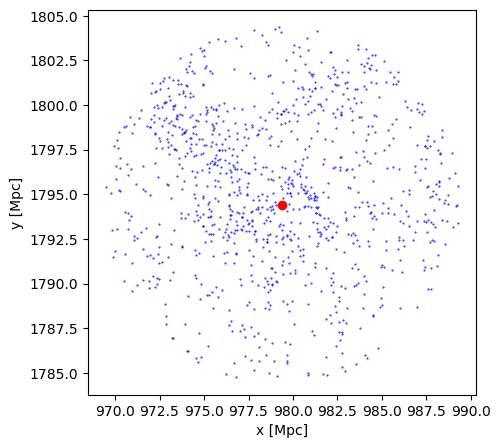

In [11]:
# create projections 2D
fig, axs = plt.subplots(1, 1)
fig.set_figwidth(5); fig.set_figheight(5)

# xy
axs.set_xlabel('x [Mpc]'); axs.set_ylabel('y [Mpc]')
axs.scatter(x[nearby_halos_xy],y[nearby_halos_xy], marker='.', s=0.75, c='blue') #, c=s, vmin=10**14, vmax = 2*10**14)
axs.scatter(x[np.where(dt_cent['halo_id'] == ids[0])], y[np.where(dt_cent['halo_id'] == ids[0])], c='red')

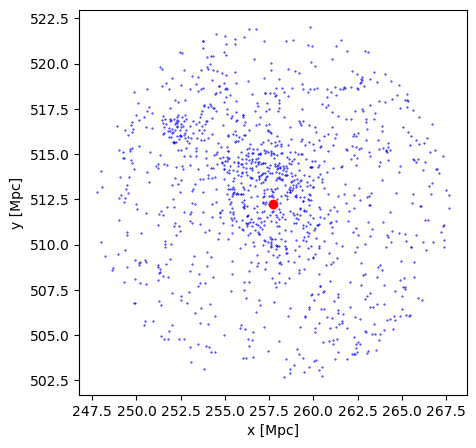

In [10]:
# create projections 2D
fig, axs = plt.subplots(1, 1)
fig.set_figwidth(5); fig.set_figheight(5)

# xy
axs.set_xlabel('x [Mpc]'); axs.set_ylabel('y [Mpc]')
axs.scatter(x[nearby_halos_xy2],y[nearby_halos_xy2], marker='.', s=0.75, c='blue') #, c=s, vmin=10**14, vmax = 2*10**14)
axs.scatter(x[np.where(dt_cent['halo_id'] == ids[1])], y[np.where(dt_cent['halo_id'] == ids[1])], c='red')

In [12]:
# getting the axis of this as a test
import getAxes

In [19]:
cent_x = x[np.where(dt_cent['halo_id'] == ids[0])]; cent_y = y[np.where(dt_cent['halo_id'] == ids[0])]
maj_xy1, min_xy1 = getAxes.get_axes(x[nearby_halos_xy]-cent_x, y[nearby_halos_xy]-cent_y)

cent_x2 = x[np.where(dt_cent['halo_id'] == ids[1])]; cent_y2 = y[np.where(dt_cent['halo_id'] == ids[1])]
maj_xy2, min_xy2 = getAxes.get_axes(x[nearby_halos_xy2]-cent_x2, y[nearby_halos_xy2]-cent_y2)

In [20]:
print(maj_xy1)
print(maj_xy2)

(1.0, array([-0.90230001,  0.43110867]))
(1.0, array([-0.74059462,  0.67195208]))


In [21]:
dist_x1_1 = x[nearby_halos_xy]-cent_x
dist_x2_1 = y[nearby_halos_xy]-cent_y

dist_x1_2 = x[nearby_halos_xy2]-cent_x2
dist_x2_2 = y[nearby_halos_xy2]-cent_y2

In [22]:
maj_slice_1 = getAxes.get_axis_cut(maj_xy1[1], dist_x1_1, dist_x2_1, 30, 10)
min_slice_1 = getAxes.get_axis_cut(min_xy1[1], dist_x1_1, dist_x2_1, 30, 10)

maj_slice_2 = getAxes.get_axis_cut(maj_xy2[1], dist_x1_2, dist_x2_2, 30, 10)
min_slice_2 = getAxes.get_axis_cut(min_xy2[1], dist_x1_2, dist_x2_2, 30, 10)

/global/u1/d/dericj/triaxiality-clusters/getAxes.py:42: RuntimeWarning: invalid value encountered in divide
  th = np.arctan(x2 / x1)


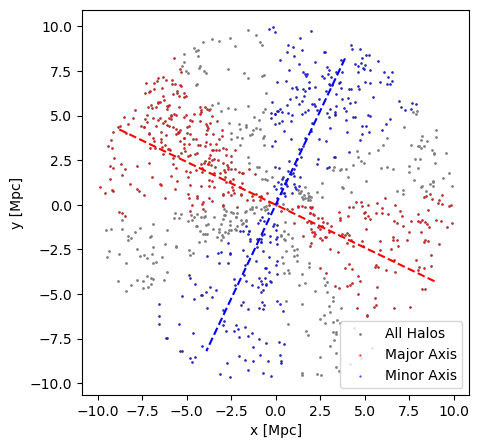

In [33]:
fig, ax = plt.subplots(1, 1)
fig.set_figwidth(5); fig.set_figheight(5)

x_min = np.min(x[nearby_halos_xy]-cent_x); y_min = np.min(y[nearby_halos_xy]-cent_y)
x_max = np.max(x[nearby_halos_xy]-cent_x); y_max = np.max(y[nearby_halos_xy]-cent_y)

# xy
ax.set_xlabel('x [Mpc]'); ax.set_ylabel('y [Mpc]')
ax.scatter(dist_x1_1,dist_x2_1, marker='o', s=1, c='grey', label='All Halos')
ax.scatter(x[nearby_halos_xy][maj_slice_1]-cent_x,y[nearby_halos_xy][maj_slice_1]-cent_y, marker='.', s=0.75, c='red', label='Major Axis')
ax.scatter(x[nearby_halos_xy][min_slice_1]-cent_x,y[nearby_halos_xy][min_slice_1]-cent_y, marker='.', s=0.75, c='blue', label='Minor Axis')
ax.plot([-maj_xy1[1][0]*x_max,maj_xy1[1][0]*maj_xy1[0]*x_max], [-maj_xy1[1][1]*y_max,maj_xy1[1][1]*y_max], '--', color='red')
ax.plot([-min_xy1[1][0]*min_xy1[0]*x_max,min_xy1[1][0]*min_xy1[0]*x_max], [-min_xy1[1][1]*min_xy1[0]*y_max,min_xy1[1][1]*min_xy1[0]*y_max], '--', color='blue')

plt.legend()
plt.savefig('nearby_clusters_xy_axis1.png')
plt.show()

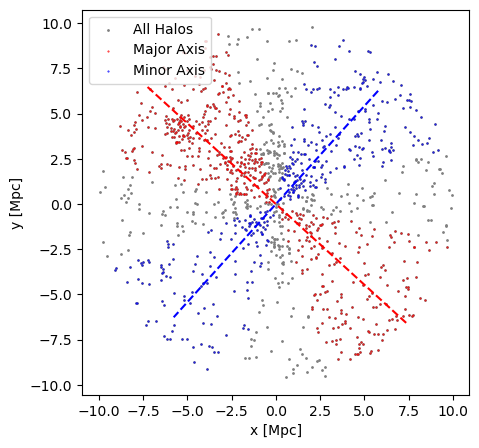

In [34]:
fig, ax = plt.subplots(1, 1)
fig.set_figwidth(5); fig.set_figheight(5)

x_min = np.min(x[nearby_halos_xy2]-cent_x2); y_min = np.min(y[nearby_halos_xy2]-cent_y2)
x_max = np.max(x[nearby_halos_xy2]-cent_x2); y_max = np.max(y[nearby_halos_xy2]-cent_y2)

# xy
ax.set_xlabel('x [Mpc]'); ax.set_ylabel('y [Mpc]')
ax.scatter(dist_x1_2,dist_x2_2, marker='o', s=1, c='grey', label='All Halos')
ax.scatter(x[nearby_halos_xy2][maj_slice_2]-cent_x2,y[nearby_halos_xy2][maj_slice_2]-cent_y2, marker='.', s=0.75, c='red', label='Major Axis')
ax.scatter(x[nearby_halos_xy2][min_slice_2]-cent_x2,y[nearby_halos_xy2][min_slice_2]-cent_y2, marker='.', s=0.75, c='blue', label='Minor Axis')
ax.plot([-maj_xy2[1][0]*x_max,maj_xy2[1][0]*maj_xy2[0]*x_max], [-maj_xy2[1][1]*y_max,maj_xy2[1][1]*y_max], '--', color='red')
ax.plot([-min_xy2[1][0]*min_xy2[0]*x_max,min_xy2[1][0]*min_xy2[0]*x_max], [-min_xy2[1][1]*min_xy2[0]*y_max,min_xy2[1][1]*min_xy2[0]*y_max], '--', color='blue')

plt.legend()
plt.savefig('nearby_clusters_xy_axis2.png')
plt.show()